In [43]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
sns.set()
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

import sklearn
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv(r"D:\avocado.csv\avocado.csv")

In [23]:
df.head()

Date  AveragePrice  Total Volume  Total Sales     4046       4225  \
0  12/27/2015          1.33      64236.62   85434.7046  1036.74   54454.85   
1  12/20/2015          1.35      54876.98   74083.9230   674.28   44638.81   
2  12/13/2015          0.93     118220.22  109944.8046   794.70  109149.67   
3  12/06/2015          1.08      78992.15   85311.5220  1132.00   71976.41   
4  11/29/2015          1.28      51039.60   65330.6880   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
Total Sales     18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 1.8+ MB


In [97]:
df['AveragePrice'].mean()

1.4059784097758825

In [98]:
df['Total Volume'].mean()

850644.0130089332

In [5]:
df.describe()

AveragePrice  Total Volume   Total Sales          4046          4225  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  9.279484e+05  2.930084e+05  2.951546e+05   
std        0.402677  3.453545e+06  3.686048e+06  1.264989e+06  1.204120e+06   
min        0.440000  8.456000e+01  1.344504e+02  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  1.716418e+04  8.540700e+02  3.008780e+03   
50%        1.370000  1.073768e+05  1.395298e+05  8.645300e+03  2.906102e+04   
75%        1.660000  4.329623e+05  5.141914e+05  1.110202e+05  1.502069e+05   
max        3.250000  6.250565e+07  5.437991e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [7]:
#counting region columns and number of entries per region 

num_list_items = 10
regions = df.groupby(df.region)
print("Total regions : ", len(regions))
print("Printing first ", num_list_items, "Region ")
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))
    num_list_items -= 1
    if num_list_items == 0: break

Total regions :  54
Printing first  10 Region 
-------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338


In [101]:
#Field partners distribute loans for kiva, this shows the top ones and funding counts

print("Top Avocado buying Regions : ", len(df["region"].unique()))
print(df["region"].value_counts().head(10))
Region = df['region'].value_counts().head(40)
plt.figure(figsize=(15,8))
sns.barplot(region.index, region.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Total Sales Volime', fontsize=18)
plt.title("Top Avocado buying Regions", fontsize=25)
plt.show()

Top Avocado buying Regions :  54
Columbus       338
Roanoke        338
Detroit        338
StLouis        338
TotalUS        338
Houston        338
Spokane        338
Chicago        338
GrandRapids    338
LosAngeles     338
Name: region, dtype: int64


NameError: name 'region' is not defined

<Figure size 1080x576 with 0 Axes>

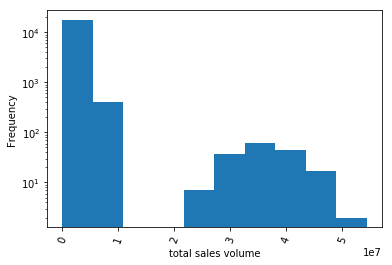

In [8]:
#requires calculating total sales in usd

df['Total Sales'].plot(kind = 'hist', rot=70, logx=False, logy=True)
plt.xlabel('total sales volume')
plt.show()

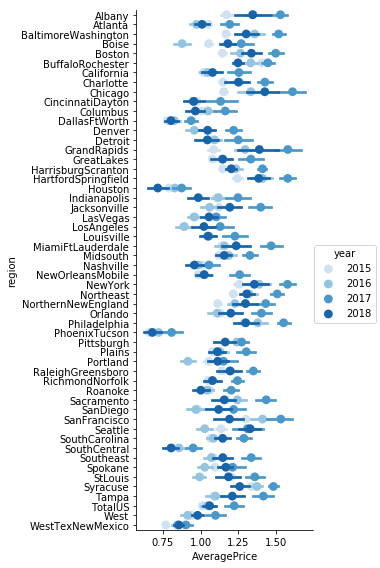

In [104]:
#Year and Price Boxplot for Regions

mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=8,
                   aspect=0.6,
                   palette='Blues',
                   join=False,
              )
plt.show()

In [105]:
#average price in 2018 calculation
#groupby region and sort by price then grab the indices

order = (
   df[mask & (df['year']==2018)]
    .groupby('region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)

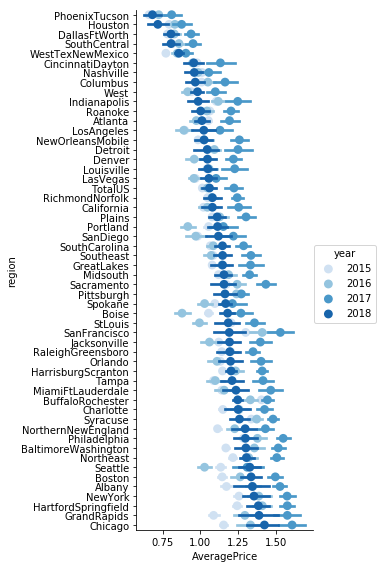

In [106]:

g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=8,
                   aspect=0.6,
                   palette='Blues',
                   order=order,
                   join=False,
              )

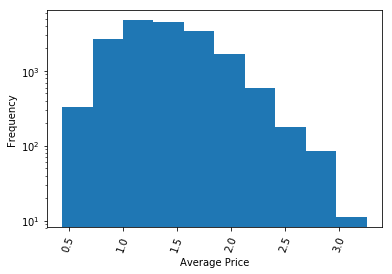

In [107]:
df['AveragePrice'].plot(kind = 'hist', rot=70, logx=False, logy=True)
plt.xlabel('Average Price')
plt.show()

In [108]:
df.groupby(['AveragePrice', 'region']).mean()

Total Volume   Total Sales          4046  \
AveragePrice region                                                        
0.44         CincinnatiDayton   6.405704e+04  2.818510e+04  2.238400e+02   
0.46         PhoenixTucson      2.200550e+06  1.012253e+06  1.200633e+06   
0.48         Detroit            5.089073e+04  2.442755e+04  7.175700e+02   
0.49         CincinnatiDayton   4.402403e+04  2.157177e+04  2.527900e+02   
             PhoenixTucson      1.137707e+06  5.574766e+05  7.383148e+05   
0.51         CincinnatiDayton   4.198786e+04  2.141381e+04  2.254400e+02   
             Houston            1.475741e+06  7.526279e+05  9.850402e+05   
             Nashville          1.713545e+04  8.739079e+03  4.818100e+02   
             PhoenixTucson      1.404909e+06  7.165037e+05  1.067492e+06   
0.52         Columbus           3.211368e+04  1.669911e+04  7.020600e+02   
             PhoenixTucson      1.457360e+06  7.578271e+05  1.130918e+06   
             WestTexNewMexico   1.637554e+06  8.515283e+05  1.067389e+06   
0.53         Houston            1.580248e+06  8.375317e+05  1.100921e+06   
             LosAngeles         5.470227e+06  2.899220e+06  1.741607e+06   
             PhoenixTucson      1.241168e+06  6.578189e+05  9.483476e+05   
0.54         Jacksonville       3.697576e+05  1.996691e+05  1.914415e+05   
             LasVegas           6.802349e+05  3.673269e+05  2.863953e+05   
             PhoenixTucson      1.460743e+06  7.888012e+05  9.385278e+05   
0.55         Houston            1.977924e+06  1.087858e+06  1.026765e+06   
             PhoenixTucson      1.464064e+06  8.052351e+05  9.855633e+05   
0.56         Houston            2.251127e+06  1.260631e+06  8.952239e+05   
             Louisville         1.018650e+04  5.704440e+03  4.625000e+00   
             PhoenixTucson      1.336126e+06  7.482308e+05  9.384618e+05   
             Tampa              8.225487e+05  4.606272e+05  3.855841e+05   
0.57         CincinnatiDayton   2.506802e+04  1.428877e+04  1.983300e+02   
             Detroit            3.683458e+04  2.099571e+04  7.213250e+02   
             Houston            1.417208e+06  8.078086e+05  9.331818e+05   
             PhoenixTucson      1.387763e+06  7.910249e+05  9.610189e+05   
0.58         Boise              9.514357e+04  5.518327e+04  3.410308e+04   
             Houston            1.645843e+06  9.545889e+05  7.912604e+05   
...                                      ...           ...           ...   
2.86         Spokane            2.913660e+03  8.333068e+03  2.545000e+02   
2.87         Orlando            3.824550e+03  1.097646e+04  1.754500e+02   
             Seattle            2.593798e+04  7.444200e+04  1.120685e+03   
2.88         SanFrancisco       1.827598e+04  5.263482e+04  6.717740e+03   
             Spokane            2.413840e+03  6.951859e+03  1.486400e+02   
2.89         RaleighGreensboro  1.347237e+04  3.893515e+04  1.457500e+02   
             Seattle            3.085399e+04  8.916803e+04  1.289560e+03   
             Spokane            1.043410e+03  3.015455e+03  1.050700e+02   
2.90         SanFrancisco       1.768610e+04  5.128969e+04  6.727840e+03   
2.91         LasVegas           4.103970e+03  1.194255e+04  4.096500e+02   
2.92         RaleighGreensboro  1.029707e+04  3.006744e+04  8.979000e+01   
             SanFrancisco       2.121815e+04  6.195700e+04  8.013980e+03   
2.93         SanFrancisco       1.638853e+04  4.801839e+04  5.046785e+03   
             Spokane            3.047660e+03  8.929644e+03  1.817900e+02   
             WestTexNewMexico   5.373880e+03  1.574547e+04  9.010600e+02   
2.94         SanFrancisco       1.743641e+04  5.126305e+04  5.926880e+03   
             Spokane            2.375190e+03  6.983059e+03  1.812300e+02   
2.95         Spokane            2.417550e+03  7.131773e+03  1.681200e+02   
2.96         Seattle            2.684568e+04  7.946321e+04  1.134590e+03   
2.97         RaleighGreensboro  1.405255e+04  4.173607e+04  1.690600e+02   
2.99

In [109]:
df.groupby(['Total Sales', 'region']).size()

Total Sales   region           
1.344504e+02  MiamiFtLauderdale    1
6.091690e+02  MiamiFtLauderdale    1
6.570886e+02  BuffaloRochester     1
7.045018e+02  MiamiFtLauderdale    1
7.303356e+02  MiamiFtLauderdale    1
8.456720e+02  MiamiFtLauderdale    1
8.577030e+02  MiamiFtLauderdale    1
8.609590e+02  Syracuse             1
9.177878e+02  BuffaloRochester     1
9.396088e+02  Boise                1
9.650920e+02  Syracuse             1
9.982782e+02  Syracuse             1
1.020631e+03  Syracuse             1
1.024753e+03  BuffaloRochester     1
1.039662e+03  Tampa                1
1.042489e+03  Boise                1
1.053241e+03  Pittsburgh           1
1.095298e+03  Syracuse             1
1.123545e+03  Pittsburgh           1
1.127872e+03  NewOrleansMobile     1
1.130762e+03  Syracuse             1
1.149806e+03  MiamiFtLauderdale    1
1.155152e+03  Syracuse             1
1.155553e+03  Syracuse             1
1.188037e+03  Pittsburgh           1
1.219269e+03  Tampa                1
1.2329

In [110]:
df_index = df.groupby(['Total Sales', 'region']).sizerank().reset_index()
df_index[:25]

Total Sales             region  0
0      134.4504  MiamiFtLauderdale  1
1      609.1690  MiamiFtLauderdale  1
2      657.0886   BuffaloRochester  1
3      704.5018  MiamiFtLauderdale  1
4      730.3356  MiamiFtLauderdale  1
5      845.6720  MiamiFtLauderdale  1
6      857.7030  MiamiFtLauderdale  1
7      860.9590           Syracuse  1
8      917.7878   BuffaloRochester  1
9      939.6088              Boise  1
10     965.0920           Syracuse  1
11     998.2782           Syracuse  1
12    1020.6308           Syracuse  1
13    1024.7528   BuffaloRochester  1
14    1039.6624              Tampa  1
15    1042.4888              Boise  1
16    1053.2405         Pittsburgh  1
17    1095.2982           Syracuse  1
18    1123.5450         Pittsburgh  1
19    1127.8719   NewOrleansMobile  1
20    1130.7624           Syracuse  1
21    1149.8065  MiamiFtLauderdale  1
22    1155.1520           Syracuse  1
23    1155.5535           Syracuse  1
24    1188.0366         Pittsburgh  1

In [10]:
#transform dates into columns for year month day
# feature engineer date so we can use the specifics in our ML model

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [22]:
#Investigating region by highest price, lowest price and megacity price

regions = ['SanFrancisco', 'Chicago', 'PhoenixTucson']

In [23]:
mask = (
    df['region'].isin(regions)
    & (df['type']=='conventional')
)

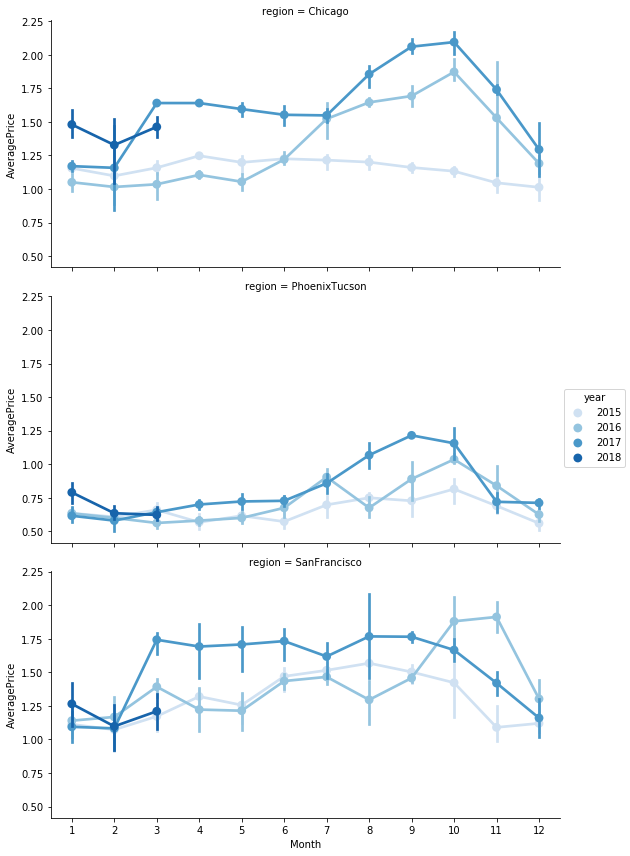

In [24]:
g = sns.factorplot('Month','AveragePrice', data=df[mask],
               hue='year',
               row='region',
               aspect=2,
               palette='Blues',
              )

In [30]:
#transform dates into columns for year month day
# feature engineer date so we can use the specifics in our ML model

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

Text(0.5,1,'Average Price')

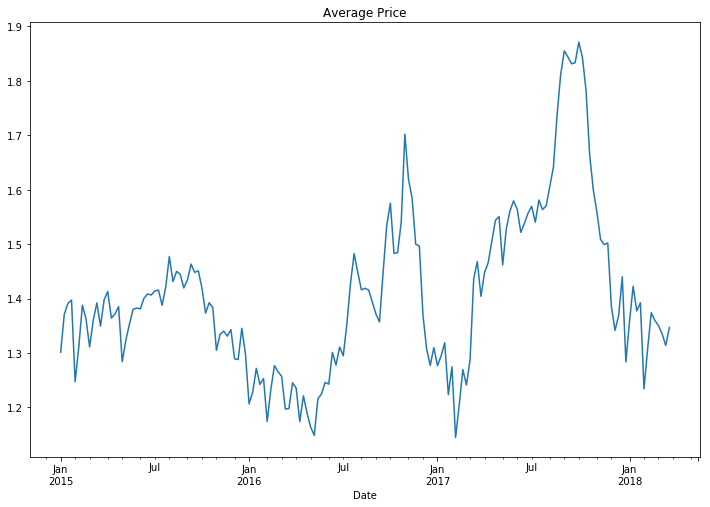

In [31]:
#price of avocados over time
#how to add axes labels?
#would love to do this by region...

byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [32]:
df['region'].nunique()

54

In [29]:
df['type'].nunique()

2

In [33]:
df.head()

Date  AveragePrice  Total Volume  Total Sales     4046       4225  \
0 2015-12-27          1.33      64236.62   85434.7046  1036.74   54454.85   
1 2015-12-20          1.35      54876.98   74083.9230   674.28   44638.81   
2 2015-12-13          0.93     118220.22  109944.8046   794.70  109149.67   
3 2015-12-06          1.08      78992.15   85311.5220  1132.00   71976.41   
4 2015-11-29          1.28      51039.60   65330.6880   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Month  Day  
0  2015  Albany     12   27  
1  2015  Albany     12   20  
2  2015  Albany     12   13  
3  2015  Albany     12    6  
4  2015  Albany     11   29

AveragePrice  Total Volume  Total Sales      4046      4225  \
AveragePrice      1.000000     -0.192752    -0.163061 -0.208317 -0.172928   
Total Volume     -0.192752      1.000000     0.985910  0.977863  0.974181   
Total Sales      -0.163061      0.985910     1.000000  0.957664  0.959448   
4046             -0.208317      0.977863     0.957664  1.000000  0.926110   
4225             -0.172928      0.974181     0.959448  0.926110  1.000000   
4770             -0.179446      0.872202     0.832975  0.833389  0.887855   
Total Bags       -0.177088      0.963047     0.961877  0.920057  0.905787   
Small Bags       -0.174730      0.967238     0.966115  0.925280  0.916031   
Large Bags       -0.172940      0.880640     0.877654  0.838645  0.810015   
XLarge Bags      -0.117592      0.747157     0.770487  0.699377  0.688809   
year              0.093197      0.017193     0.030645  0.003353 -0.009559   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
AveragePrice -0.179446   -0.177088   -0.174730   -0.172940    -0.117592   
Total Volume  0.872202    0.963047    0.967238    0.880640     0.747157   
Total Sales   0.832975    0.961877    0.966115    0.877654     0.770487   
4046          0.833389    0.920057    0.925280    0.838645     0.699377   
4225          0.887855    0.905787    0.916031    0.810015     0.688809   
4770          1.000000    0.792314    0.802733    0.698471     0.679861   
Total Bags    0.792314    1.000000    0.994335    0.943009     0.804233   
Small Bags    0.802733    0.994335    1.000000    0.902589     0.806845   
Large Bags    0.698471    0.943009    0.902589    1.000000     0.710858   
XLarge Bags   0.679861    0.804233    0.806845    0.710858     1.000000   
year         -0.036531    0.071552    0.063915    0.087891     0.081033   

                  year  
AveragePrice  0.093197  
Total Volume  0.017193  
Total Sales   0.030645  
4046          0.003353  
4225         -0.009559  
4770         -0.036531  
Total Bags    0.071552  
Small Bags    0.063915  
Large Bags    0.087891  
XLarge Bags   0.081033  
year          1.000000

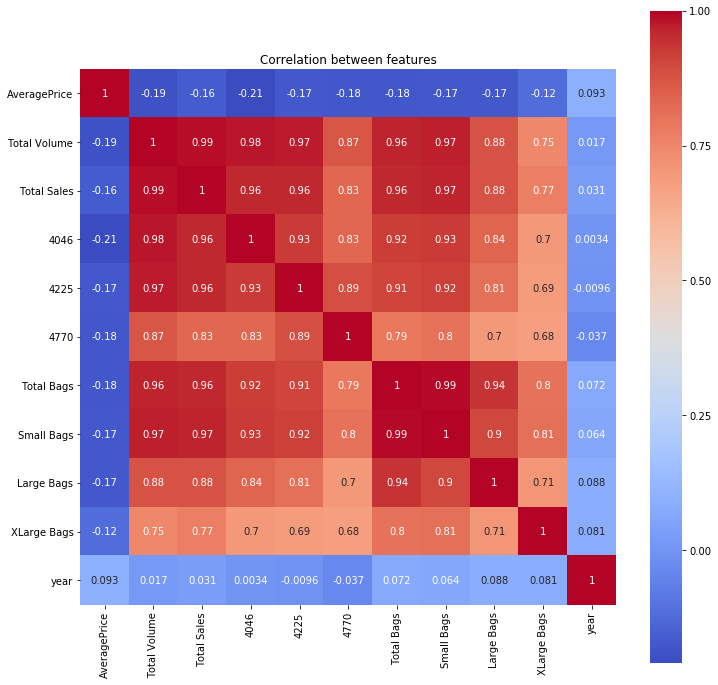

In [27]:
#Correlation Matrix - values more then 0.05 should be investigated
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between features')
corr

In [ ]:
#Correlation matrix shows that average price is not strongly correlated with any of the features but they appear correlated with each other, 

#Indicates further engineering on the categorical variable - region

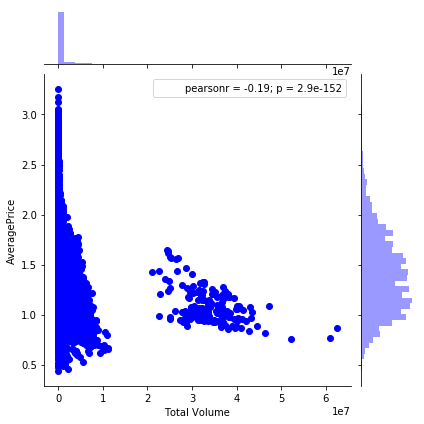

In [11]:
#total volume by average price
sns.jointplot(x='Total Volume', y='AveragePrice', data=df, color='blue')

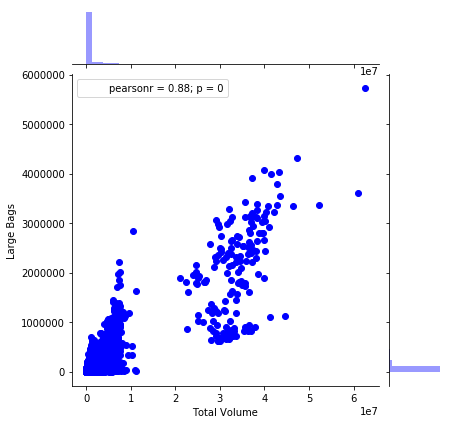

In [12]:
#total volume by large bags
sns.jointplot(x='Total Volume', y='Large Bags', data=df, color='blue')

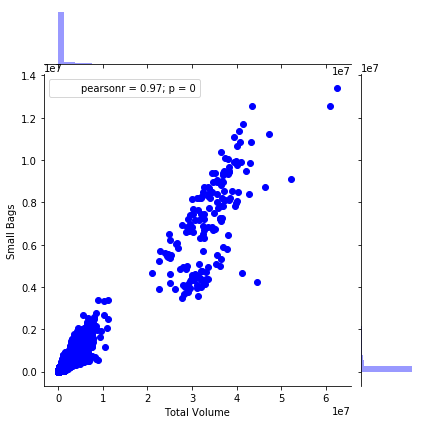

In [127]:
#small bags by volume
sns.jointplot(x='Total Volume', y='Small Bags', data=df, color='blue')

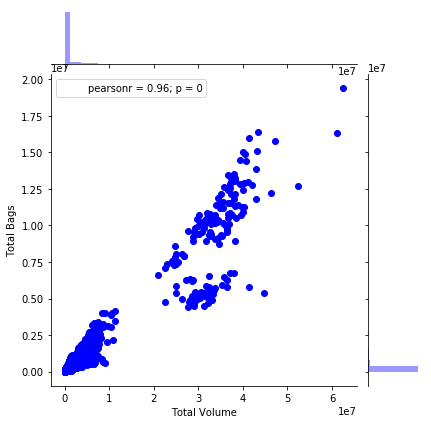

In [13]:
sns.jointplot(x='Total Volume', y='Total Bags', data=df, color='blue')

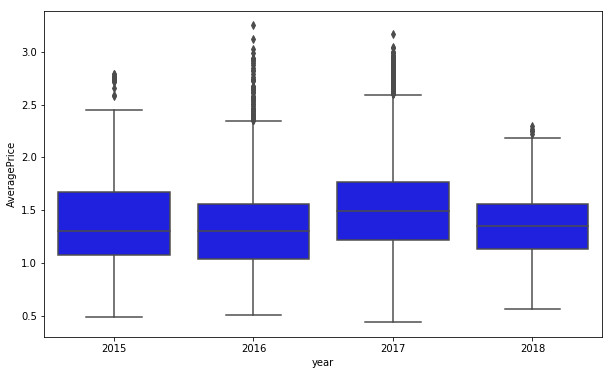

In [48]:
#distribution of average prices 

fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='year',y='AveragePrice',data=df,color='blue')

(0.44, 3.25)

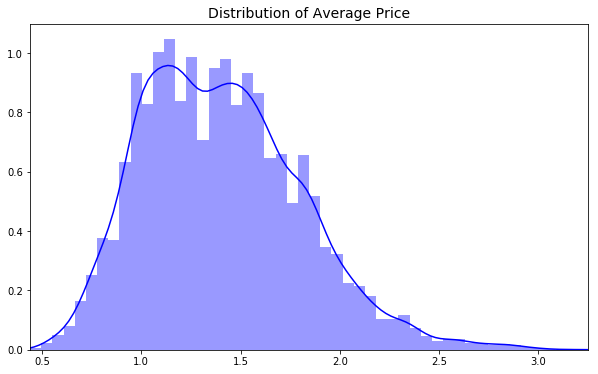

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
price_val = df['AveragePrice'].values
sns.distplot(price_val, color='b')
ax.set_title('Distribution of Average Price', fontsize=14)
ax.set_xlim([min(price_val), max(price_val)])

In [34]:
#date is being dropped as its been transformed 
#region is being dropped for this model - how do we manage this type of feature?

df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [35]:
df_final.head()


AveragePrice  Total Volume  Total Sales     4046       4225    4770  \
0          1.33      64236.62   85434.7046  1036.74   54454.85   48.16   
1          1.35      54876.98   74083.9230   674.28   44638.81   58.33   
2          0.93     118220.22  109944.8046   794.70  109149.67  130.50   
3          1.08      78992.15   85311.5220  1132.00   71976.41   72.58   
4          1.28      51039.60   65330.6880   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  year  Month  Day  \
0     8696.87     8603.62       93.25          0.0  2015     12   27   
1     9505.56     9408.07       97.49          0.0  2015     12   20   
2     8145.35     8042.21      103.14          0.0  2015     12   13   
3     5811.16     5677.40      133.76          0.0  2015     12    6   
4     6183.95     5986.26      197.69          0.0  2015     11   29   

   type_organic  
0             0  
1             0  
2             0  
3             0  
4             0

In [36]:
#Average price is a continous variable, linear regression
#X array is the training feature
#Y array is the target variable - Average price

X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
#create and train the model 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [38]:
#scatter of trained regression model, not the best model

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.22746954122846477
MSE: 0.08979284375115636
RMSE: 0.2996545406816929


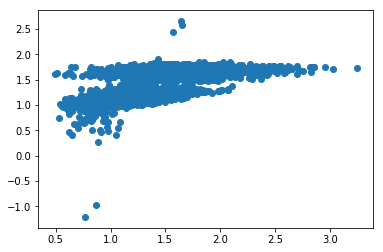

In [39]:
plt.scatter(x=y_test, y=pred)

In [40]:
#decision tree regressor model 

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0,0.5,'Predicted Y')

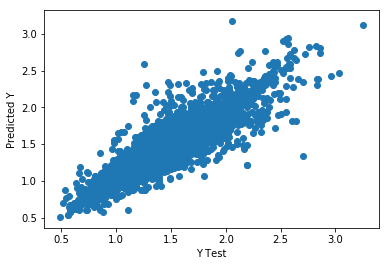

In [41]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [42]:
#model has improved with decision tree regressor 

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.11218356164383562
MSE: 0.029975315068493148
RMSE: 0.17313380683301904


In [43]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)


In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.08548273972602738
MSE: 0.015120950684931507
RMSE: 0.1229672748536435


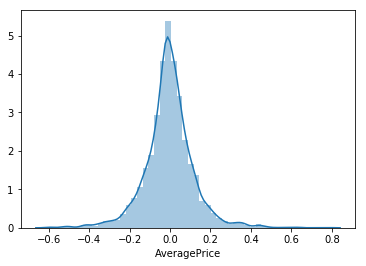

In [45]:
sns.distplot((y_test-pred),bins=50)


Y Test   Pred
8604     0.82  0.933
2608     0.97  0.989
14581    1.44  1.450
4254     0.97  0.945
16588    1.45  1.437

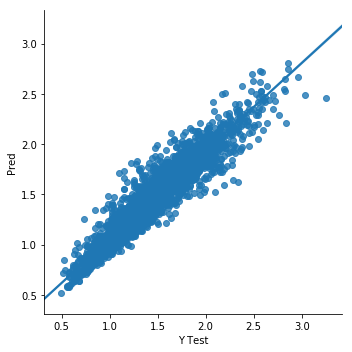

In [46]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
#next phase of analysis is plotting the values for the next 3 years 


In [3]:
from fbprophet import Prophet

In [5]:

df = pd.read_csv(r"D:\avocado.csv\avocado.csv", parse_dates=["Date"])
cols = ['Date', 'AveragePrice', 'type', 'region']
df = df[cols]
df = df[(df.region =='TotalUS') & (df.type == 'conventional') ] #& (df.Date >= '2016-01-01')

del df['region']
del df['type']

df = df.sort_values("Date")

#df.set_index("Date", inplace=True)
#df['AveragePrice'] = np.log1p(df.AveragePrice)

df.columns = ['ds', 'y']

# Train test split 
train = df[:-12]
test = df[-12:]

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 2703 to 8319
Data columns (total 2 columns):
ds    157 non-null datetime64[ns]
y     157 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [6]:
train.head()


ds     y
2703 2015-01-04  0.95
2702 2015-01-11  1.01
2701 2015-01-18  1.03
2700 2015-01-25  1.04
2699 2015-02-01  0.89

AttributeError: module 'seaborn' has no attribute 'scatterplot'

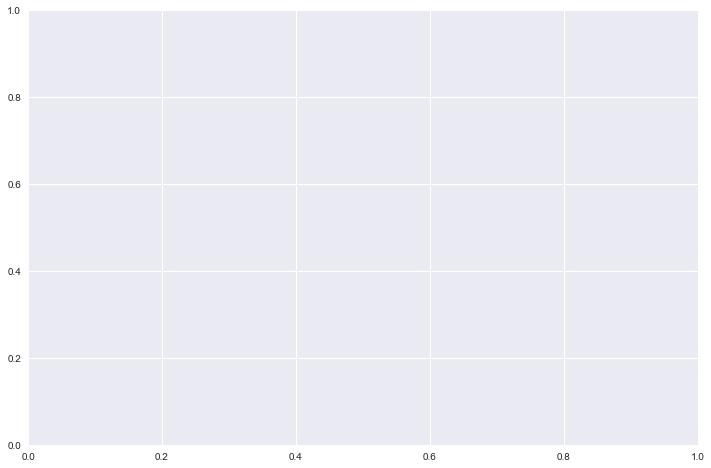

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax = sns.scatterplot(x=train.ds, y=train.y)
ax = sns.relplot(x=test.ds, y=test.y)

ax.axes.set_xlim(train.ds.min(), test.ds.max());

In [15]:
%%time
train['cap'] = train.y.max()
train['floor'] = train.y.min()

m = Prophet(growth='logistic', changepoints=['2016-06-01'], changepoint_prior_scale=0.01, 
            interval_width=0.8) 
m.add_seasonality(name='monthly', period=30.5, fourier_order=1)
m.add_seasonality(name='quarterly', period=91.25, fourier_order=5, prior_scale=0.1)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)

m.fit(train)

INFO:fbprophet.forecaster:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Wall time: 3.51 s


In [16]:
future = m.make_future_dataframe(periods=12, freq='W')
future['cap'] = 1.4 #approx max for last year same period
future['floor'] = train.y.min()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
164 2018-02-25  1.086461    0.957420    1.222336
165 2018-03-04  1.112260    0.976594    1.251558
166 2018-03-11  1.121283    0.989879    1.255416
167 2018-03-18  1.149319    1.009708    1.285163
168 2018-03-25  1.170208    1.029257    1.299482

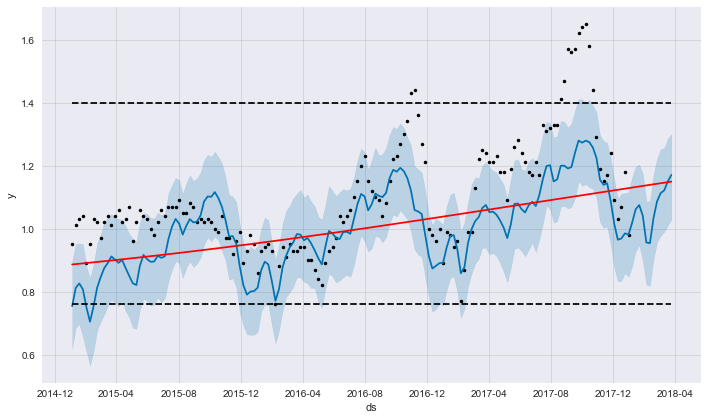

In [17]:
from  fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

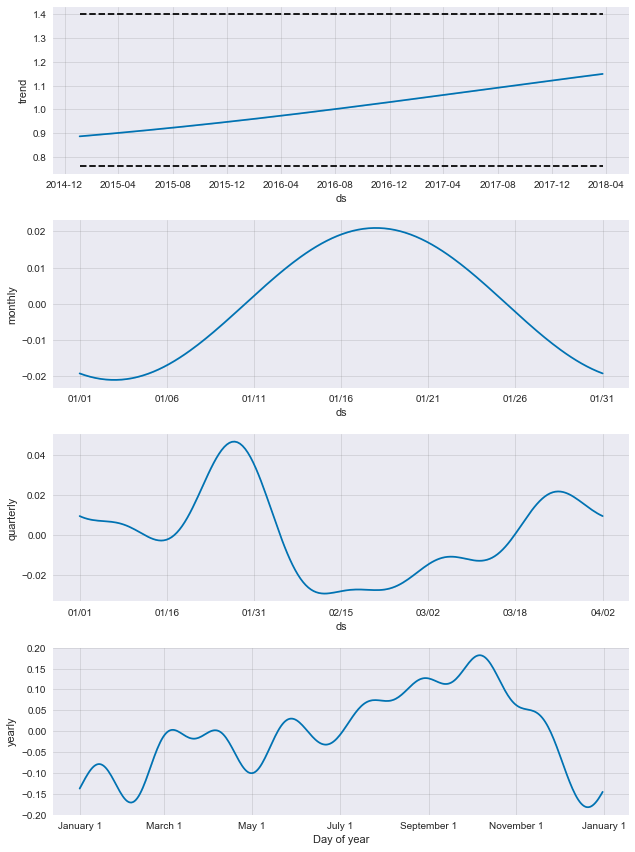

In [18]:
fig2 = m.plot_components(forecast);


In [19]:
test = pd.concat([test.set_index('ds'),forecast.set_index('ds')], axis=1, join='inner')

cols = ['y', 'yhat', 'yhat_lower', 'yhat_upper']
test = test[cols]
test['y'] = test.y
test['yhat'] = (test.yhat).round(2)
test['yhat_lower'] = (test.yhat_lower).round(2)
test['yhat_upper'] = (test.yhat_upper).round(2)

test.tail()

y  yhat  yhat_lower  yhat_upper
ds                                            
2018-02-25  1.06  1.09        0.96        1.22
2018-03-04  1.07  1.11        0.98        1.25
2018-03-11  1.09  1.12        0.99        1.26
2018-03-18  1.05  1.15        1.01        1.29
2018-03-25  1.03  1.17        1.03        1.30

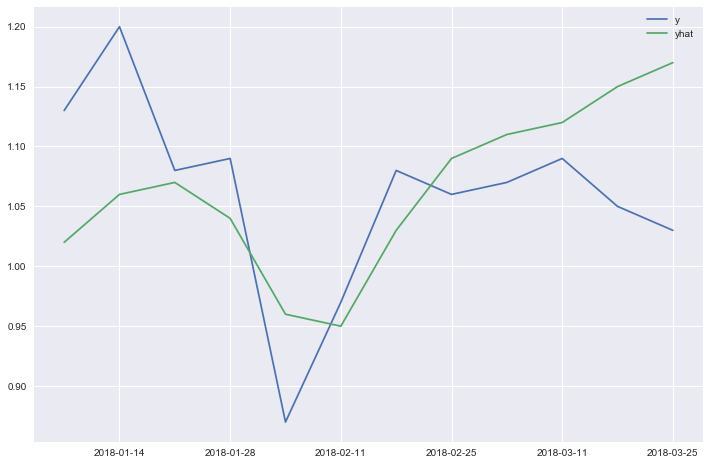

In [20]:
#graph comparing actual and predicted outcomes 

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

plt.plot(test.y)
plt.plot(test.yhat)
plt.legend();

In [28]:
#Convert date column to readable format in dataframes 
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
#List number of distinc region colunns and number of entries per column

num_list_items = 10
regions = df.groupby(df.region)
print("Total regions : ", len(regions))
print("Printing first ", num_list_items, " regions.")
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))
    num_list_items -= 1
    if num_list_items == 0: break

Total regions :  54
Printing first  10  regions.
-------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338


In [32]:
#Our gaol is predicting the price for total us
PREDICTING_FOR = "TotalUS"

In [33]:
#Our goal is predicting the date and average price for the total us
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

In [34]:
#rename df to columns being predicted (date = ds and price =y)
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})


In [35]:
#create and fit the model
m = Prophet()
m.fit(date_price)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
#predict for future demand
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

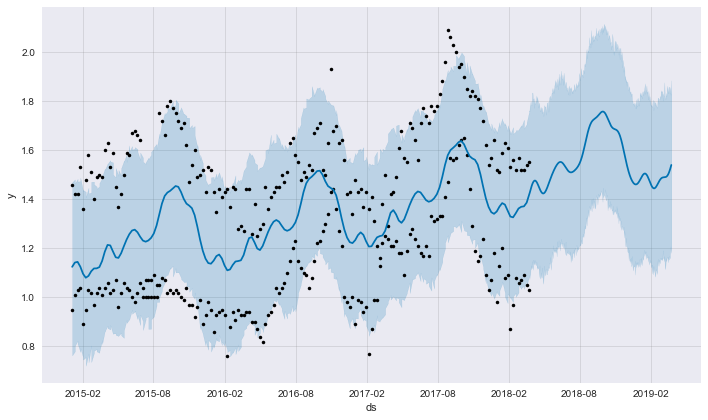

In [38]:
fig1 = m.plot(forecast)

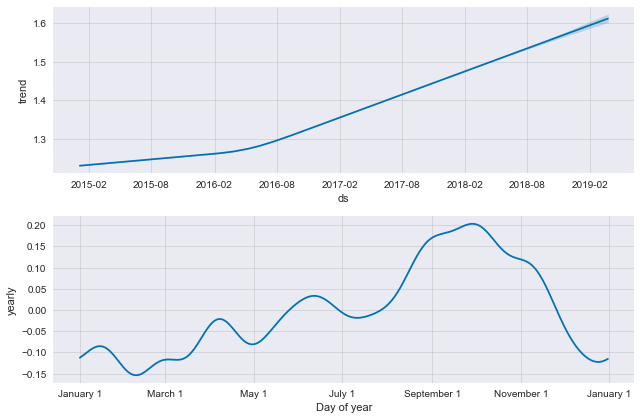

In [47]:
#trends over entire dataset and trends for yearly prices

fig2 = m.plot_components(forecast)
